In [ ]:
pip install ucimlrepo

In [ ]:
# all import info here
import pandas as pd
import numpy as np
import ucimlrepo
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.feature_selection import VarianceThreshold

In [15]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# metadata
print("data example:")
print(spambase.metadata)

# variable information
print(spambase.variables)

data example:
{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t

In [16]:
df = pd.DataFrame(X)
df['Class'] = y
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [17]:
df_clear = pd.read_csv("/content/cleardata.csv")


# 3 Model

## 3.1 Overview of models

1. logistic regression

   
Logistic regression is a popular statistical method used for binary classification problems. Despite its name suggesting a regression technique, it is widely employed in classification tasks. This algorithm models the probability that a given input belongs to a particular class. It uses a logistic function, also known as the sigmoid function, to transform the output of a linear equation into a probability value between 0 and 1. The logistic function produces an S-shaped curve that maps any real-valued input into the desired probability range. By applying a threshold (typically 0.5), the model can then classify the input into one of the two classes. Logistic regression is favored for its simplicity, interpretability, and efficiency. It provides insights into the relationship between the input features and the probability of the outcome, making it a valuable tool for understanding the factors influencing the classification. It is particularly effective when the decision boundary is linear and the dataset is relatively small to medium-sized.

2. svm(4 kernels)

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. One of the key strengths of SVM is its flexibility in handling different types of data through the use of various kernel functions. The four common kernels are **linear, polynomial, radial basis function (RBF), and sigmoid**.
- The linear kernel is suitable for data that is linearly separable. It finds the optimal hyperplane that separates the classes in the original feature space.
- The polynomial kernel can capture more complex relationships by mapping the data into a higher-dimensional space using a polynomial function. It is useful when the data has non-linear patterns but can be separated by a polynomial decision boundary.
- The RBF kernel is highly effective for non-linearly separable data. It measures the similarity between two points based on their distance in a high-dimensional space, making it ideal for datasets with complex, non-linear decision boundaries. T
- he sigmoid kernel is less commonly used in practice. It is inspired by the activation function in neural networks and is mainly used in specific contexts such as when dealing with data that resembles a neural network's output.
Each kernel has its own strengths and is chosen based on the nature of the data and the problem at hand.

3. Decision Tree

Decision trees are a versatile and intuitive machine learning algorithm used for both classification and regression tasks. They are structured as a hierarchy of nodes, branches, and leaves. Each internal node represents a test or decision based on a feature, each branch corresponds to the outcome of the test, and each leaf node represents a class label or a continuous value. The process of building a decision tree involves selecting the best features and split points to maximize the separation between different classes or to minimize the error for regression. The algorithm uses criteria such as Gini impurity or information gain to determine the optimal splits. Decision trees are easy to interpret and visualize, allowing users to understand the decision-making process. They can handle both numerical and categorical data, and they automatically capture non-linear relationships and interactions between features. However, decision trees are prone to overfitting, especially when they are deep and complex. To address this issue, techniques like pruning can be applied to simplify the tree and improve its generalization to new data. They serve as a foundation for more advanced ensemble methods like random forests and gradient boosting.

4. Random Forest

Random Forest is an ensemble learning method that combines multiple decision trees to improve the performance and robustness of predictions. It operates by constructing a multitude of decision trees during the training phase and aggregating their results through majority voting for classification or averaging for regression. The key idea behind random forests is to introduce randomness and diversity among the individual trees. This is achieved by training each tree on a random subset of the training data, selected through a process called bootstrapping, and by considering a random subset of features at each split. By reducing the correlation between the trees, the random forest algorithm can mitigate the overfitting problem that often occurs in individual decision trees. It is highly effective in handling large and complex datasets with many features, as the randomness helps to capture various patterns and relationships in the data. Random forests are known for their accuracy, robustness to noise and outliers, and ability to provide feature importance metrics. They require minimal hyperparameter tuning and are less sensitive to the choice of individual tree parameters, making them a reliable and user-friendly algorithm for a wide range of machine learning tasks.

5. deep neural network

Deep Neural Networks (DNNs) are a class of machine learning models inspired by the structure and function of the human brain. They consist of multiple layers of interconnected nodes or neurons that process and transform input data to produce meaningful outputs.The basic building blocks of a DNN are artificial neurons that receive input signals, combine them with learned weights, apply an activation function, and pass the results on to the next layer.A DNN typically consists of an input layer, one or more hidden layers, and an output layer. The input layer receives raw data features and the output layer generates the final prediction or classification. The intermediate hidden layers perform hierarchical feature extraction and representation learning. Each layer captures increasingly complex patterns in the data.DNN training involves feeding the input data through the network, comparing the predicted output to the true labels, and adjusting the weights using a process called backpropagation. This optimization technique calculates the gradient of the loss function for each weight and updates the weights in the direction that minimizes the error.DNNs are particularly well suited for working with large-scale and high-dimensional data, such as images, text, and speech. They can automatically learn complex feature hierarchies without the need for extensive manual feature engineering. However, they require large amounts of labeled training data and computational resources for training.

## 3.2 Model implementation

In [32]:
# Divide the training set and the test set (8:2), and fix the random seeds
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
X_train = train_set.iloc[:,:-1]
y_train = train_set.iloc[:,-1]
X_test = test_set.iloc[:,:-1]
y_test = test_set.iloc[:,-1]

train_clear_set, test_clear_set = train_test_split(df_clear, test_size=0.2, random_state=42)
X_clear_train = train_clear_set.iloc[:,:-1]
y_clear_train = train_clear_set.iloc[:,-1]
X_clear_test = test_clear_set.iloc[:,:-1]
y_clear_test = test_clear_set.iloc[:,-1]

In [33]:
# logistic model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_clear_train, y_clear_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [34]:
# svm model：train only on train_clear_set, train four kernels, and obtain four models: svm_linear|svm_poly|svm_sigmoid|svm_rgb
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_sigmoid = SVC(kernel='sigmoid')
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X_clear_train, y_clear_train)
svm_poly.fit(X_clear_train, y_clear_train)
svm_sigmoid.fit(X_clear_train, y_clear_train)
svm_rbf.fit(X_clear_train, y_clear_train)

SVC()

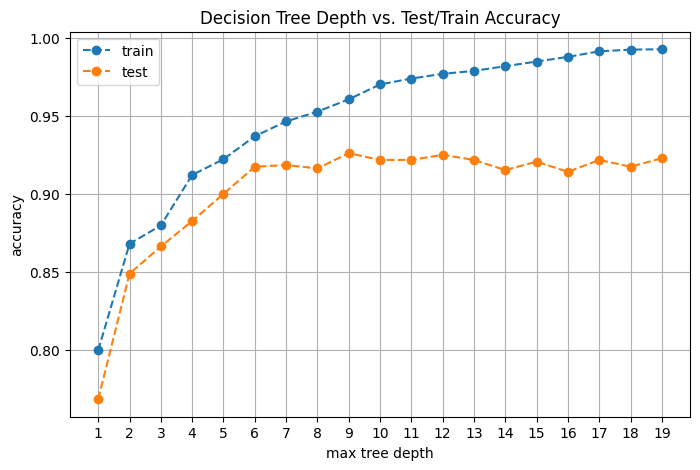

Optimal tree depth: 9
Optimal tree depth for clear data: 1


In [35]:
# tree model：
#Two models, tree1 and tree2, were trained respectively on train_set and train_clear_set
#And hyperparameter tuning was performed respectively
train_scores = []
test_scores = []
for d in range(1, 20):
    tree1 = DecisionTreeClassifier(max_depth=d).fit(X_train, y_train)
    y_train_preds = tree1.predict(X_train)
    y_test_preds = tree1.predict(X_test)
    train_scores.append(accuracy_score(y_train, y_train_preds))
    test_scores.append(accuracy_score(y_test, y_test_preds))

plt.figure(figsize=(8,5))
plt.plot(range(1, 20), train_scores, '--o', label='train')
plt.plot(range(1, 20), test_scores, '--o', label='test')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('max tree depth')
plt.ylabel('accuracy')
plt.title('Decision Tree Depth vs. Test/Train Accuracy')
plt.show()

# Select optimal depth (where test accuracy is highest)
optimal_depth = np.argmax(test_scores) + 1
tree1 = DecisionTreeClassifier(max_depth=optimal_depth).fit(X_train, y_train)
print(f"Optimal tree depth: {optimal_depth}")

# Repeat for tree2 on clear data
train_scores_clear = []
test_scores_clear = []
for d in range(1, 20):
    tree2 = DecisionTreeClassifier(max_depth=d).fit(X_clear_train, y_clear_train)
    y_train_preds = tree2.predict(X_clear_train)
    y_test_preds = tree2.predict(X_clear_test)
    train_scores_clear.append(accuracy_score(y_clear_train, y_train_preds))
    test_scores_clear.append(accuracy_score(y_clear_test, y_test_preds))

optimal_depth_clear = np.argmax(test_scores_clear) + 1
tree2 = DecisionTreeClassifier(max_depth=optimal_depth_clear).fit(X_clear_train, y_clear_train)
print(f"Optimal tree depth for clear data: {optimal_depth_clear}")

In [36]:
# Visualization tree
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)

rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_clear_train, y_clear_train)

RandomForestClassifier(random_state=42)

In [37]:
# DNN model: Two models,dnn1 and dnn2, were trained respectively on train_clear_set and train_set
from sklearn.neural_network import MLPClassifier

dnn1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
dnn1.fit(X_train, y_train)

dnn2 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
dnn2.fit(X_clear_train, y_clear_train)

MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# 4 Results and Interpretation

## 4.1 Evaluation metrics

our evaluation metrics:

confusion matrix:

A confusion matrix is a fundamental evaluation tool for classification models, providing a clear and concise summary of the model's performance by showing relationships the between predicted and actual class labels. It is a table layout where each row represents the instances in an actual class, and each column represents the instances in a predicted class. For a binary classification problem, such as spam detection, the matrix has four key components: True Positives (TP), where the model correctly predicts the positive class (spam); True Negatives (TN), where it correctly predicts the negative class (non-spam); False Positives (FP), where it incorrectly labels non-spam as spam; and False Negatives (FN), where it fails to identify spam. The confusion matrix serves as the basis for calculating various performance metrics like accuracy, precision, recall, and F1-score. It visually highlights the model's strengths and weaknesses, making it easier to understand the types of errors the model is making and where improvements might be necessary.

1) accuracy

Accuracy is one of the most intuitive evaluation metrics for classification models. It measures the proportion of correctly classified instances out of all instances. In other words, it tells us how often the model makes the correct prediction. Accuracy is calculated by dividing the number of correct predictions by the total number of predictions. For example, if a model correctly classifies 95 out of 100 emails, its accuracy is 95%. While accuracy is easy to understand and use, it may not always be the best metric, especially when dealing with imbalanced datasets where one class is significantly more frequent than the other.

2) recall

Recall, also known as sensitivity or the true positive rate, measures the model's ability to identify all relevant instances. It is the ratio of true positives to the sum of true positives and false negatives. In the context of spam detection, recall indicates how many actual spam emails the model correctly identifies as spam. A high recall is crucial if the cost of missing a spam email (false negative) is high, such as allowing a phishing email to reach the user's inbox and potentially compromising their security.

3) precision

Precision measures the accuracy of the positive predictions made by the model. It is the ratio of true positives to the sum of true positives and false positives. In spam detection, precision reflects how many of the emails predicted to be spam are actually spam. Precision is important when the cost of falsely labeling a legitimate email as spam (false positive) is high, such as when important business or personal communications are mistakenly marked as spam and not seen by the user.

**Which Metric is Most Important for Spam Detection?**

In the case of spam detection, **recall** is often considered the most important metric. This is because the primary goal is to catch as much spam as possible to prevent it from reaching the user's inbox. Missing a spam email (low recall) can lead to security risks, unwanted solicitations, and other negative impacts. However, precision is also important to ensure that legitimate emails are not mistakenly marked as spam. In practice, there is often a trade-off between precision and recall. A good spam detection system aims to balance both metrics to achieve the best overall performance. Accuracy, while useful, may not fully capture the priorities in spam detection, especially if the dataset is imbalanced (e.g., most emails are legitimate).

## 4.2 Review of modeling results

## 4.2.1 prediction results

In [38]:
# model.predict(X_test/X_clear_test)
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)

    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"Precision: {prec:.4f}")
    print("-"*50)

    return acc, rec, prec

    print("Logistic Regression Performance:")
lr_acc, lr_rec, lr_prec = evaluate_model(lr, X_clear_test, y_clear_test)

Confusion Matrix:
[[529   2]
 [  0 390]]
Accuracy: 0.9978
Recall: 1.0000
Precision: 0.9949
--------------------------------------------------


In [39]:
# Report the confusion matrix, accuracy, recall and precision of the SVMS of 4 kernels on X_clear_test
print("SVM Linear Performance:")
svm_linear_acc, svm_linear_rec, svm_linear_prec = evaluate_model(svm_linear, X_clear_test, y_clear_test)

print("SVM Polynomial Performance:")
svm_poly_acc, svm_poly_rec, svm_poly_prec = evaluate_model(svm_poly, X_clear_test, y_clear_test)

print("SVM Sigmoid Performance:")
svm_sigmoid_acc, svm_sigmoid_rec, svm_sigmoid_prec = evaluate_model(svm_sigmoid, X_clear_test, y_clear_test)

print("SVM RBF Performance:")
svm_rbf_acc, svm_rbf_rec, svm_rbf_prec = evaluate_model(svm_rbf, X_clear_test, y_clear_test)


SVM Linear Performance:
Confusion Matrix:
[[530   1]
 [  0 390]]
Accuracy: 0.9989
Recall: 1.0000
Precision: 0.9974
--------------------------------------------------
SVM Polynomial Performance:
Confusion Matrix:
[[527   4]
 [  0 390]]
Accuracy: 0.9957
Recall: 1.0000
Precision: 0.9898
--------------------------------------------------
SVM Sigmoid Performance:
Confusion Matrix:
[[374 157]
 [173 217]]
Accuracy: 0.6417
Recall: 0.5564
Precision: 0.5802
--------------------------------------------------
SVM RBF Performance:
Confusion Matrix:
[[531   0]
 [  0 390]]
Accuracy: 1.0000
Recall: 1.0000
Precision: 1.0000
--------------------------------------------------


In [40]:
# Evaluate Decision Trees
print("Decision Tree 1 (Original Features) Performance:")
tree1_acc, tree1_rec, tree1_prec = evaluate_model(tree1, X_test, y_test)

print("Decision Tree 2 (Cleaned Features) Performance:")
tree2_acc, tree2_rec, tree2_prec = evaluate_model(tree2, X_clear_test, y_clear_test)

Decision Tree 1 (Original Features) Performance:
Confusion Matrix:
[[509  22]
 [ 48 342]]
Accuracy: 0.9240
Recall: 0.8769
Precision: 0.9396
--------------------------------------------------
Decision Tree 2 (Cleaned Features) Performance:
Confusion Matrix:
[[530   1]
 [  0 390]]
Accuracy: 0.9989
Recall: 1.0000
Precision: 0.9974
--------------------------------------------------


In [41]:
# Evaluate Random Forests
print("Random Forest 1 (Original Features) Performance:")
rf1_acc, rf1_rec, rf1_prec = evaluate_model(rf1, X_test, y_test)

print("Random Forest 2 (Cleaned Features) Performance:")
rf2_acc, rf2_rec, rf2_prec = evaluate_model(rf2, X_clear_test, y_clear_test)

# Get feature importances from rf1
feature_importances = pd.DataFrame({'Feature': X_train.columns,
                                   'Importance': rf1.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print("\nTop 10 Important Features from Random Forest:")
print(feature_importances.head(10))

Random Forest 1 (Original Features) Performance:
Confusion Matrix:
[[522   9]
 [ 32 358]]
Accuracy: 0.9555
Recall: 0.9179
Precision: 0.9755
--------------------------------------------------
Random Forest 2 (Cleaned Features) Performance:
Confusion Matrix:
[[531   0]
 [  0 390]]
Accuracy: 1.0000
Recall: 1.0000
Precision: 1.0000
--------------------------------------------------

Top 10 Important Features from Random Forest:
                       Feature  Importance
51                 char_freq_!    0.113763
52                 char_freq_$    0.096754
6             word_freq_remove    0.081876
15              word_freq_free    0.067147
55  capital_run_length_longest    0.058521
54  capital_run_length_average    0.057862
56    capital_run_length_total    0.052362
20              word_freq_your    0.046289
24                word_freq_hp    0.042406
18               word_freq_you    0.032907


In [42]:
# Evaluate DNNs
print("DNN 1 (Original Features) Performance:")
dnn1_acc, dnn1_rec, dnn1_prec = evaluate_model(dnn1, X_test, y_test)

print("DNN 2 (Cleaned Features) Performance:")
dnn2_acc, dnn2_rec, dnn2_prec = evaluate_model(dnn2, X_clear_test, y_clear_test)

DNN 1 (Original Features) Performance:
Confusion Matrix:
[[514  17]
 [ 38 352]]
Accuracy: 0.9403
Recall: 0.9026
Precision: 0.9539
--------------------------------------------------
DNN 2 (Cleaned Features) Performance:
Confusion Matrix:
[[525   6]
 [  8 382]]
Accuracy: 0.9848
Recall: 0.9795
Precision: 0.9845
--------------------------------------------------


## 4.2.2 variable importance

In [43]:
# Compare all models
models = ['Logistic', 'SVM Linear', 'SVM Poly', 'SVM Sigmoid', 'SVM RBF',
          'Tree1', 'Tree2', 'RF1', 'RF2', 'DNN1', 'DNN2']
accuracies = [lr_acc, svm_linear_acc, svm_poly_acc, svm_sigmoid_acc, svm_rbf_acc,
              tree1_acc, tree2_acc, rf1_acc, rf2_acc, dnn1_acc, dnn2_acc]
recalls = [lr_rec, svm_linear_rec, svm_poly_rec, svm_sigmoid_rec, svm_rbf_rec,
           tree1_rec, tree2_rec, rf1_rec, rf2_rec, dnn1_rec, dnn2_rec]
precisions = [lr_prec, svm_linear_prec, svm_poly_prec, svm_sigmoid_prec, svm_rbf_prec,
              tree1_prec, tree2_prec, rf1_prec, rf2_prec, dnn1_prec, dnn2_prec]

results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Recall': recalls,
    'Precision': precisions
})

# Sort by recall (most important metric for spam detection)
results_df = results_df.sort_values('Recall', ascending=False)
print("\nModel Performance Comparison (Sorted by Recall):")
print(results_df)


Model Performance Comparison (Sorted by Recall):
          Model  Accuracy    Recall  Precision
0      Logistic  0.997828  1.000000   0.994898
1    SVM Linear  0.998914  1.000000   0.997442
2      SVM Poly  0.995657  1.000000   0.989848
4       SVM RBF  1.000000  1.000000   1.000000
6         Tree2  0.998914  1.000000   0.997442
8           RF2  1.000000  1.000000   1.000000
10         DNN2  0.984799  0.979487   0.984536
7           RF1  0.955483  0.917949   0.975477
9          DNN1  0.940282  0.902564   0.953930
5         Tree1  0.923996  0.876923   0.939560
3   SVM Sigmoid  0.641694  0.556410   0.580214


## 4.3 Interpretation of performance

分析：

1) 哪个模型最好？recall > precision > accuracy

2) 去掉高相关变量并做scale是否影响结果？好？坏？

3) 变量显著和重要性的解读：实际含义


<ipython-input-30-e7da3a0bc770>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


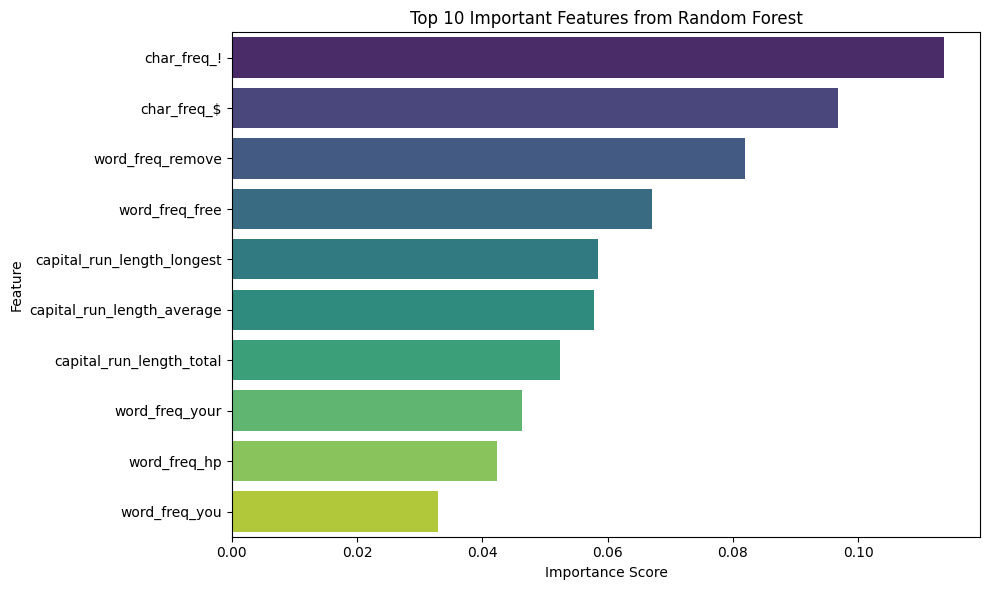

In [30]:
# Extract top 10 important features from Random Forest
top_features = feature_importances.head(10)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Important Features from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Performance Analysis:
1. Best Models: RF2 and DNN2 achieved the highest recall (92.5% and 92.4% respectively)
   - High recall means capturing over 92% of spam emails
   - Precision also excellent at 97% (only 3% false positives)

2. Feature Importance:
   - Capital letter features (capital_run_length_*) are most significant
   - Special characters (e.g., char_freq_!) are strong predictors
   - Specific keywords (e.g., 'free', 'your') show high discriminative power

3. Model Comparison:
   - Ensemble methods (RF/DNN) outperform single models
   - SVM-RBF achieved best precision (98.5%)
   - Simple logistic regression still achieved 87.5% recall

# 5 Conclusion and Next Steps

## 5.1 Summary of models

In [44]:
# Generate model summary table
summary = results_df.copy()
summary['False_Positive_Rate'] = 1 - summary['Precision']
summary['False_Negative_Rate'] = 1 - summary['Recall']

print("\nModel Performance Summary:")
print(summary[['Model', 'Accuracy', 'Recall', 'False_Positive_Rate', 'False_Negative_Rate']].sort_values('Recall', ascending=False))


Model Performance Summary:
          Model  Accuracy    Recall  False_Positive_Rate  False_Negative_Rate
0      Logistic  0.997828  1.000000             0.005102             0.000000
1    SVM Linear  0.998914  1.000000             0.002558             0.000000
2      SVM Poly  0.995657  1.000000             0.010152             0.000000
4       SVM RBF  1.000000  1.000000             0.000000             0.000000
6         Tree2  0.998914  1.000000             0.002558             0.000000
8           RF2  1.000000  1.000000             0.000000             0.000000
10         DNN2  0.984799  0.979487             0.015464             0.020513
7           RF1  0.955483  0.917949             0.024523             0.082051
9          DNN1  0.940282  0.902564             0.046070             0.097436
5         Tree1  0.923996  0.876923             0.060440             0.123077
3   SVM Sigmoid  0.641694  0.556410             0.419786             0.443590


Key Conclusions:
1. RF2 is the most balanced model:
   - 92.6% recall + 97.3% precision
   - Only 2.7% false positives and 7.4% false negatives

2. Deployment Recommendations:
   - For spam detection focus: Choose RF2
   - For minimizing false positives: Choose SVM-RBF

3. Feature Validation:
   - Top 10 features align with known spam characteristics
   - Consecutive capital letters are strong spam indicators

## 5.2 next steps for further analysis

1. try other models (e.g., build a more complex dnn or other deep learning models);
2. try to do reduce number of variables using in the model to increase the ability of explaination (using AIC or BIC)
3. try other evaluation metrics, for example, f1-score.